<a href="https://colab.research.google.com/github/DineshKumar1239/Deep-Learning-Projects/blob/main/DL_project_3_FASHION_MNIST_using_tensorflow_with_neural_network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"training sample;\n{train_data[0]}\n")
print(f"traininhg lables;\n{train_labels[0]}\n")

training sample;
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

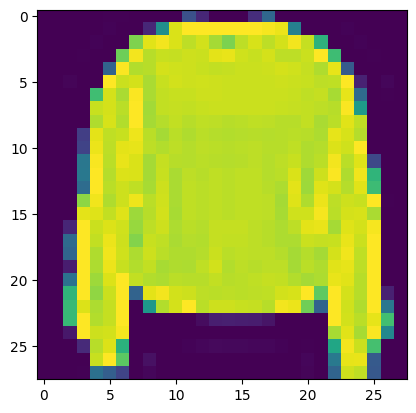

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
c=len(class_names)

In [ ]:
c

10

Text(0.5, 1.0, 'Coat')

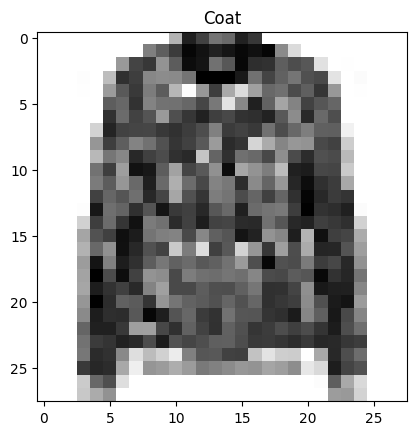

In [ ]:
index_of_choice=238
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

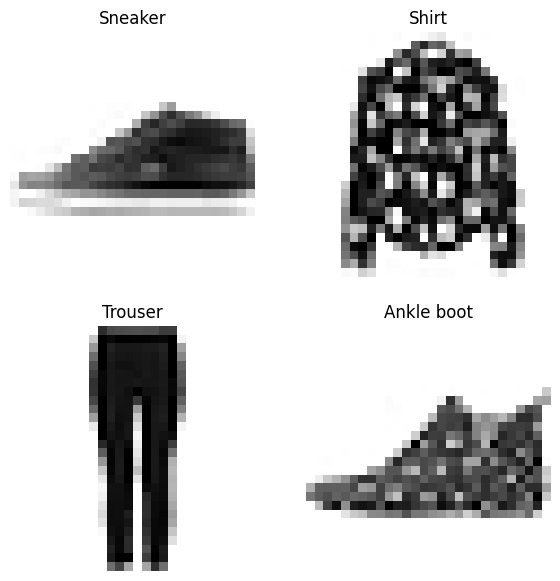

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history=model_1.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.4103 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3020 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [ ]:
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history=model_2.fit(train_data_norm,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5310 - accuracy: 0.3945 - val_loss: 1.2963 - val_accuracy: 0.4854
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2113 - accuracy: 0.5133 - val_loss: 1.1591 - val_accuracy: 0.5338
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0966 - accuracy: 0.5562 - val_loss: 1.0614 - val_accuracy: 0.5670
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0287 - accuracy: 0.5778 - val_loss: 1.0214 - val_accuracy: 0.5891
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9931 - accuracy: 0.6072 - val_loss: 0.9771 - val_accuracy: 0.6438
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9181 - accuracy: 0.6856 - val_loss: 0.8915 - val_accuracy: 0.7204
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8486 - accuracy: 0.7236 - val_loss: 0.8446 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

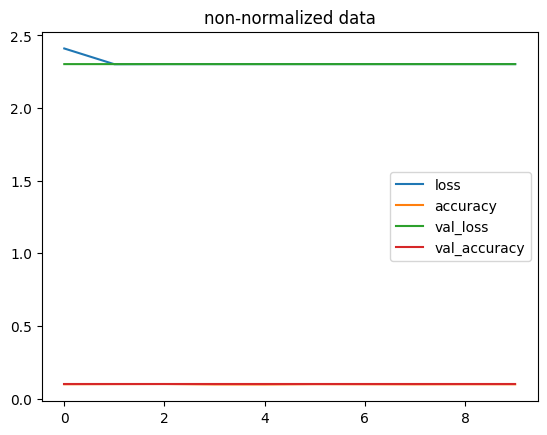

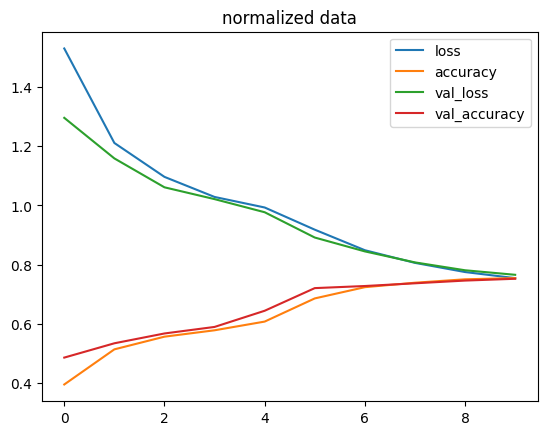

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non-normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

norm_history=model_3.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm,test_labels),
                         callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2836 - accuracy: 0.5464 - val_loss: 0.8829 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7263 - accuracy: 0.7427 - val_loss: 0.6720 - val_accuracy: 0.7647 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6227 - accuracy: 0.7821 - val_loss: 0.6365 - val_accuracy: 0.7756 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5882 - accuracy: 0.7951 - val_loss: 0.6105 - val_accuracy: 0.7875 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5735 - accuracy: 0.8002 - val_loss: 0.6101 - val_accuracy: 0.7909 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5628 - accuracy: 0.8048 - val_loss: 0.6061 - val_accuracy: 0.7879 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'finding the ideal learning rate')

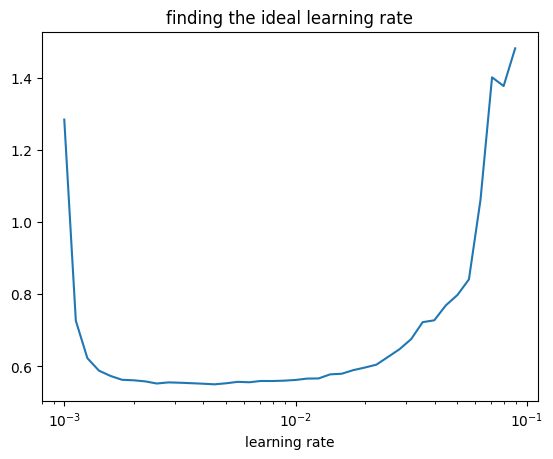

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,norm_history.history["loss"])
plt.xlabel("learning rate")
plt.title("finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_4.fit(train_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0596 - accuracy: 0.5888 - val_loss: 0.7643 - val_accuracy: 0.7269
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7012 - accuracy: 0.7479 - val_loss: 0.6965 - val_accuracy: 0.7522
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6486 - accuracy: 0.7652 - val_loss: 0.6745 - val_accuracy: 0.7551
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6284 - accuracy: 0.7732 - val_loss: 0.6541 - val_accuracy: 0.7652
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6170 - accuracy: 0.7741 - val_loss: 0.6705 - val_accuracy: 0.7556
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6080 - accuracy: 0.7782 - val_loss: 0.6453 - val_accuracy: 0.7688
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6023 - accuracy: 0.7818 - val_loss: 0.6824 - val_accuracy:

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
y_probs = model_4.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 6ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.        , 0.00419829,
        0.        , 0.99580175, 0.        , 0.        , 0.        ]],
      dtype=float32)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_preds=y_probs.argmax(axis=1)

In [ ]:
y_preds[:10]

array([9, 2, 9, 9, 6, 1, 4, 4, 8, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[604,   4,  30, 110,  27,   0, 191,   0,  32,   2],
       [  0, 161,   0,  79,   7,   0,   0,   0,  38, 715],
       [  5,   0, 314,   9, 594,   0,  38,   1,  39,   0],
       [ 18,   1,   4, 778,  43,   0,  38,   0, 112,   6],
       [  0,   0,   6,  13, 791,   0,   4,   0, 186,   0],
       [  0,   0,   0,   0,   0,   3,   0, 168, 450, 379],
       [ 75,   2,  55,  61, 549,   0, 184,   0,  73,   1],
       [  0,   0,   0,   0,   0,   0,   0, 785,   5, 210],
       [  0,   0,   3,   4,  31,   0,   1,   4, 955,   2],
       [  0,   0,   0,   0,   1,   0,   0,   9,   7, 983]])

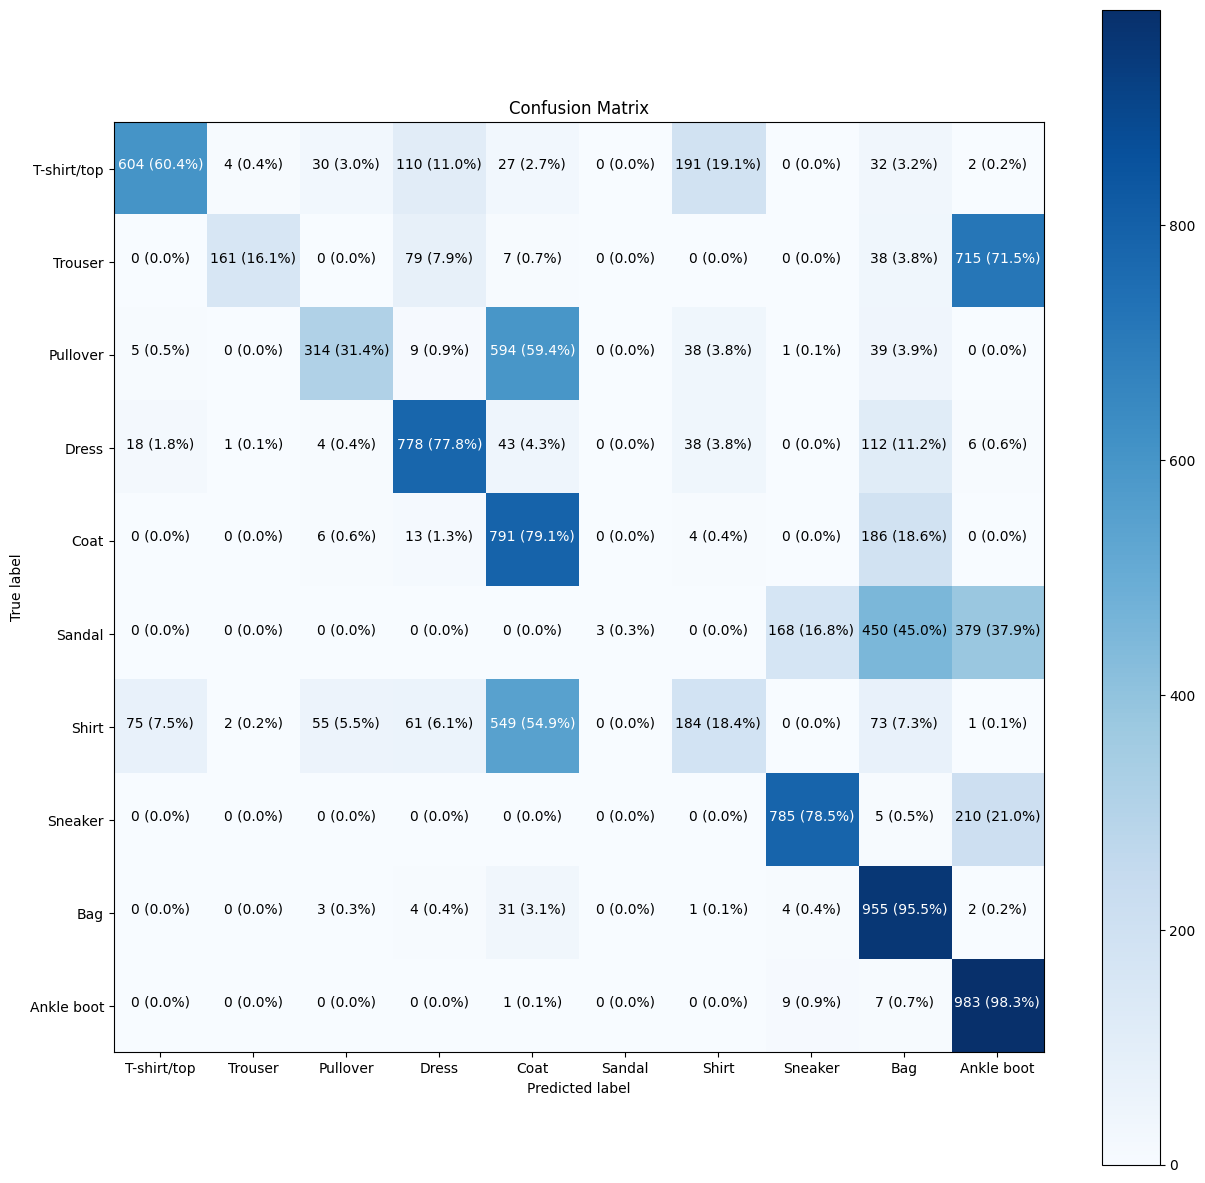

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

